# Laboratory practice № 3 (forced movement)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np

In [2]:
dt = 0.001

In [14]:
color = ["b", "g", "r"]

## Task 1

Mode pairs: 

5. neutral & time proportional
6. conservative modes
7. pair of stable oscillating modes


In [5]:
a_1 = sympy.Symbol("a_1")
a_0 = sympy.Symbol("a_0")
lambdas = [
    [0, 0],
    [sympy.I, -sympy.I],
    [-1 + sympy.I, -1 - sympy.I]
]

In [6]:
sols = []
for l in lambdas:
    sol = sympy.solve([l[0] + l[1] + a_1,l[0]*l[1] -a_0],a_1,a_0)
    sols.append([float(sol[a_1]), float(sol[a_0])])
    print("Solutions:",*sols[-1])

Solutions: 0.0 0.0
Solutions: 0.0 1.0
Solutions: 2.0 2.0


In [7]:
y = sympy.Function("y")
t = sympy.Symbol("t")

In [24]:
sympy.dsolve(y(t).diff(t,2)+sols[0][0]*y(t).diff(t) + sols[0][1]*y(t), 0)

Eq(y(t), C1 + C2*t)

In [9]:
sympy.dsolve(y(t).diff(t,2)+sols[1][0]*y(t).diff(t) + sols[1][1]*y(t), 0)

Eq(y(t), C1*sin(t) + C2*cos(t))

In [10]:
sympy.dsolve(y(t).diff(t,2)+sols[2][0]*y(t).diff(t) + sols[2][1]*y(t), 0)

Eq(y(t), (C1*sin(1.0*t) + C2*cos(1.0*t))*exp(-1.0*t))

In [11]:
transferFunction_1_1 = ctrl.tf([1.], [1., *sols[0]])
transferFunction_1_2 = ctrl.tf([1.], [1., *sols[1]])
transferFunction_1_3 = ctrl.tf([1.], [1., *sols[2]])

In [12]:
state_space_1_1, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_1), form="reachable")
state_space_1_2, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_2), form="reachable")
state_space_1_3, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_3), form="reachable")

In [13]:
modeling_time_1 = 10 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))
u_1_1 = np.ones_like(time_1)*2.5
u_1_2 = 0.5 * time_1
u_1_3 = np.cos(time_1)

In [15]:
init_state_1_1 = [0,-1]
init_state_1_2 = [0,0]
init_state_1_3 = [0,1]

In [17]:
us = ["2.5", "0.5t", "\cos(t)"]
is_ = ["-1", "0", "1"]

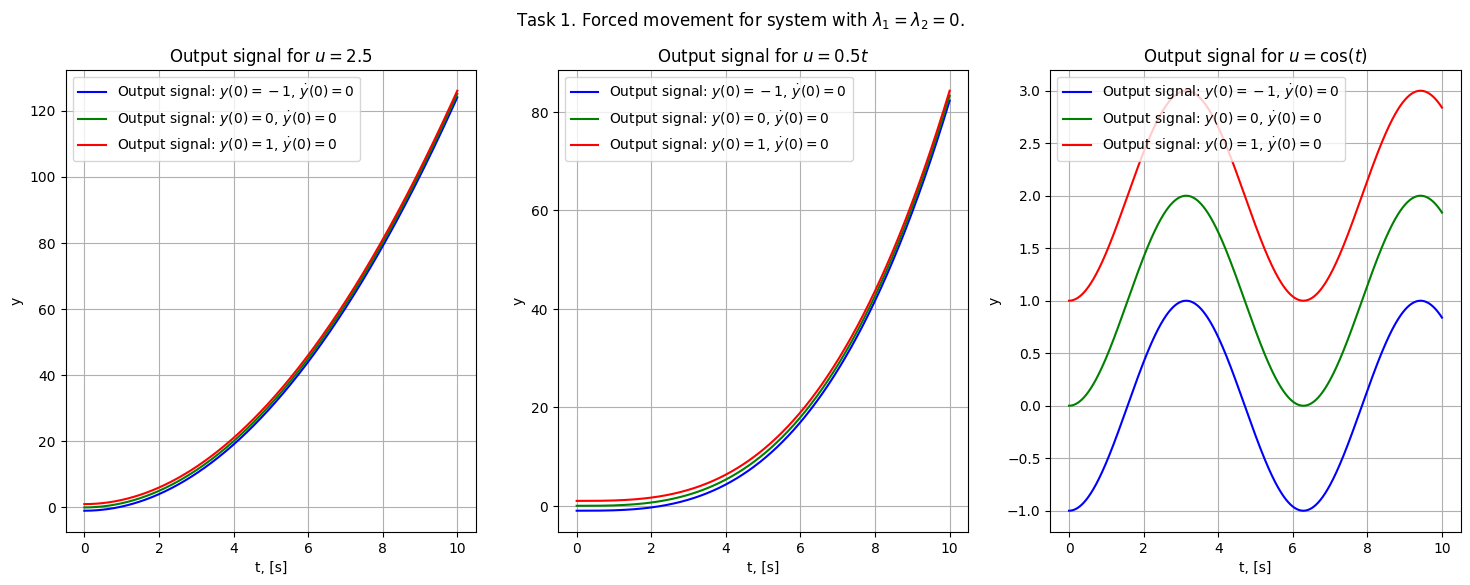

In [21]:

y_1_1 = [[], [], []]
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_1, T=time_1))
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_2, T=time_1))
y_1_1[0].append(ctrl.forced_response(state_space_1_1, U=u_1_1, X0=init_state_1_3, T=time_1))

y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_1, T=time_1))
y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_2, T=time_1))
y_1_1[1].append(ctrl.forced_response(state_space_1_1, U=u_1_2, X0=init_state_1_3, T=time_1))

y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_1, T=time_1))
y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_2, T=time_1))
y_1_1[2].append(ctrl.forced_response(state_space_1_1, U=u_1_3, X0=init_state_1_3, T=time_1))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system with $\lambda_1 = \lambda_2 = 0$.")
for j in range(3):
    for i in range(3):
        ax[j].plot(time_1, y_1_1[j][i].outputs, color[i],label=f"Output signal: $y(0)={is_[i]}$, $\dot y(0)=0$")
        ax[j].set_ylabel("y")
        ax[j].set_xlabel("t, [s]")
        ax[j].grid(True)
        ax[j].set_title(f"Output signal for $u={us[j]}$")
        ax[j].legend()